In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install yfinance

In [3]:
import yfinance as yf # for financial data

In [4]:
df = yf.download("GOOG", period="5y", interval="1d")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-25,57.180000,57.195499,55.639000,56.240501,56.240501,43146000
2018-06-26,56.400002,56.660500,55.832951,55.923000,55.923000,31264000
2018-06-27,56.067001,56.591801,55.181000,55.199001,55.199001,25878000
2018-06-28,55.104500,56.115501,54.800499,55.710999,55.710999,21448000
2018-06-29,56.000000,56.411350,55.750000,55.782501,55.782501,26302000
...,...,...,...,...,...,...
2023-06-16,126.699997,126.699997,123.790001,124.059998,124.059998,56686800
2023-06-20,123.535004,125.175003,122.830002,123.849998,123.849998,22698000
2023-06-21,123.235001,123.410004,120.860001,121.260002,121.260002,22612000


In [5]:
df = df.asfreq('D')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-25,57.180000,57.195499,55.639000,56.240501,56.240501,43146000.0
2018-06-26,56.400002,56.660500,55.832951,55.923000,55.923000,31264000.0
2018-06-27,56.067001,56.591801,55.181000,55.199001,55.199001,25878000.0
2018-06-28,55.104500,56.115501,54.800499,55.710999,55.710999,21448000.0
2018-06-29,56.000000,56.411350,55.750000,55.782501,55.782501,26302000.0
...,...,...,...,...,...,...
2023-06-19,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-20,123.535004,125.175003,122.830002,123.849998,123.849998,22698000.0
2023-06-21,123.235001,123.410004,120.860001,121.260002,121.260002,22612000.0


In [6]:
df = df.fillna(method='ffill')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-25,57.180000,57.195499,55.639000,56.240501,56.240501,43146000.0
2018-06-26,56.400002,56.660500,55.832951,55.923000,55.923000,31264000.0
2018-06-27,56.067001,56.591801,55.181000,55.199001,55.199001,25878000.0
2018-06-28,55.104500,56.115501,54.800499,55.710999,55.710999,21448000.0
2018-06-29,56.000000,56.411350,55.750000,55.782501,55.782501,26302000.0
...,...,...,...,...,...,...
2023-06-19,126.699997,126.699997,123.790001,124.059998,124.059998,56686800.0
2023-06-20,123.535004,125.175003,122.830002,123.849998,123.849998,22698000.0
2023-06-21,123.235001,123.410004,120.860001,121.260002,121.260002,22612000.0


In [7]:
# filter columns
ts = df[['Close']]
ts

,Close
Date,
2018-06-25,56.240501
2018-06-26,55.923000
2018-06-27,55.199001
2018-06-28,55.710999
2018-06-29,55.782501
...,...
2023-06-19,124.059998
2023-06-20,123.849998
2023-06-21,121.260002


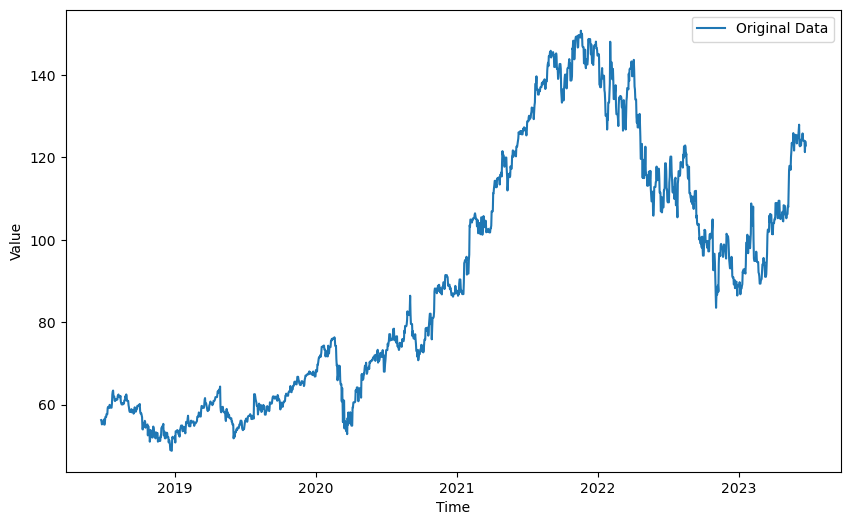

In [8]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Original Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [9]:
# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='additive')

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

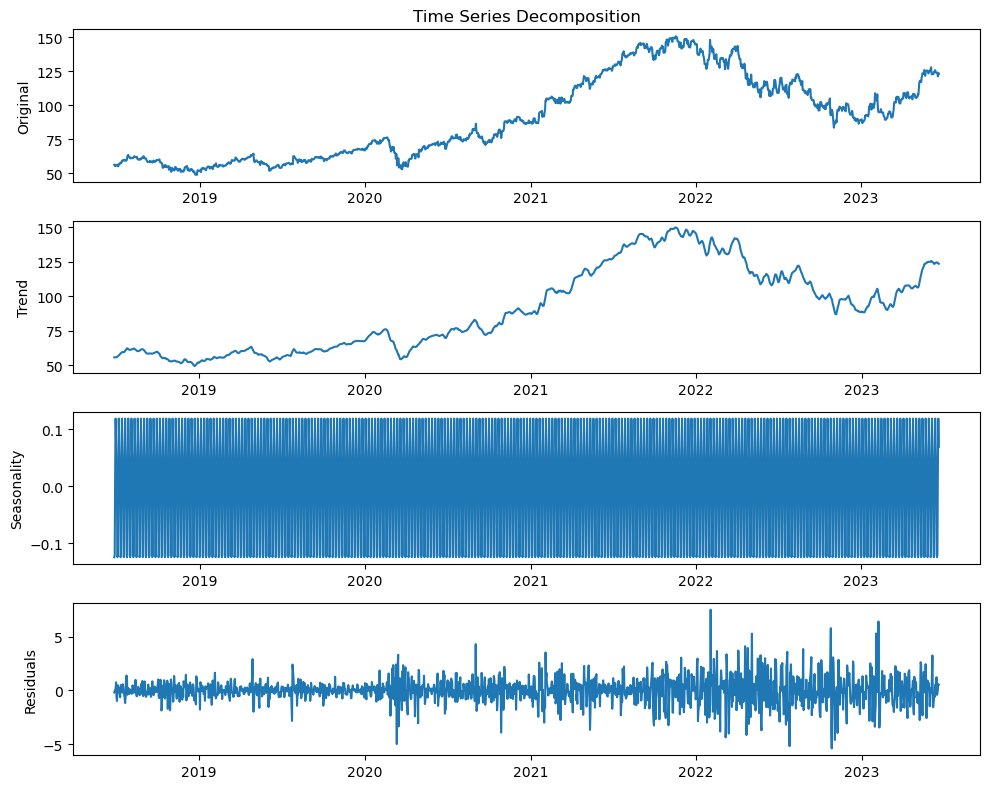

In [11]:
# Create subplots for each component
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Plot the original time series
axes[0].plot(ts, label='Original')
axes[0].set_ylabel('Original')

# Plot the trend component
axes[1].plot(trend, label='Trend')
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')

# Plot the residuals component
axes[3].plot(residuals, label='Residuals')
axes[3].set_ylabel('Residuals')

# Add titles and legends
axes[0].set_title('Time Series Decomposition')
plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts)

# Extract p-value from the result
p_value = result[1]

print(p_value)


0.7160650796218352


In [13]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00


In [14]:
from pmdarima.arima.utils import ndiffs

In [15]:
ndiffs(ts, test="adf")

1

In [16]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts.Close.diff().dropna())

# Extract p-value from the result
p_value = result[1]

print(p_value)


1.0440625885675245e-21


In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

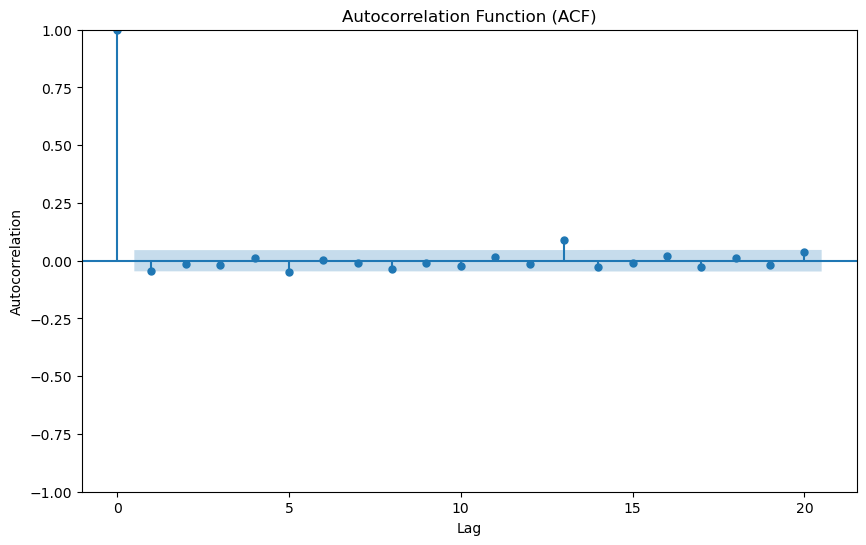

In [18]:
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


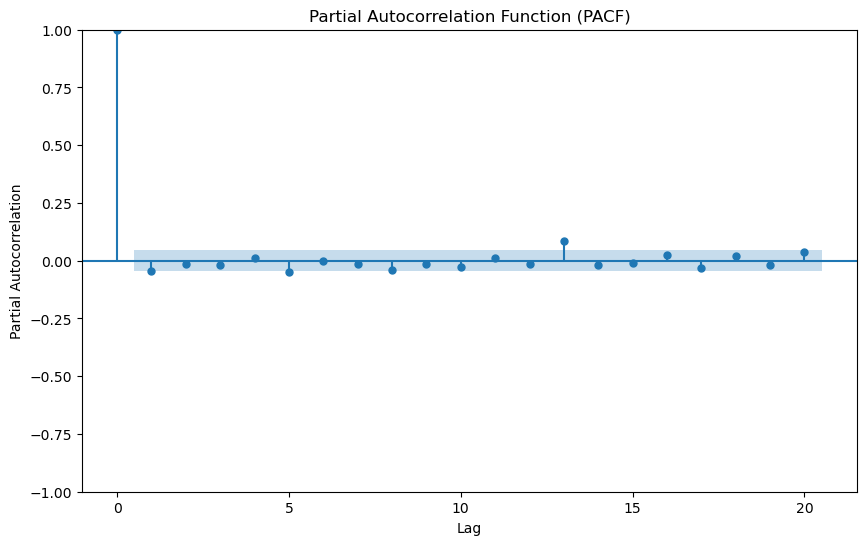

In [19]:
# Plot PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [20]:
# train/test split
ts_train = ts.iloc[:int(ts.size * .8)]
ts_test = ts.iloc[int(ts.size * .8):]

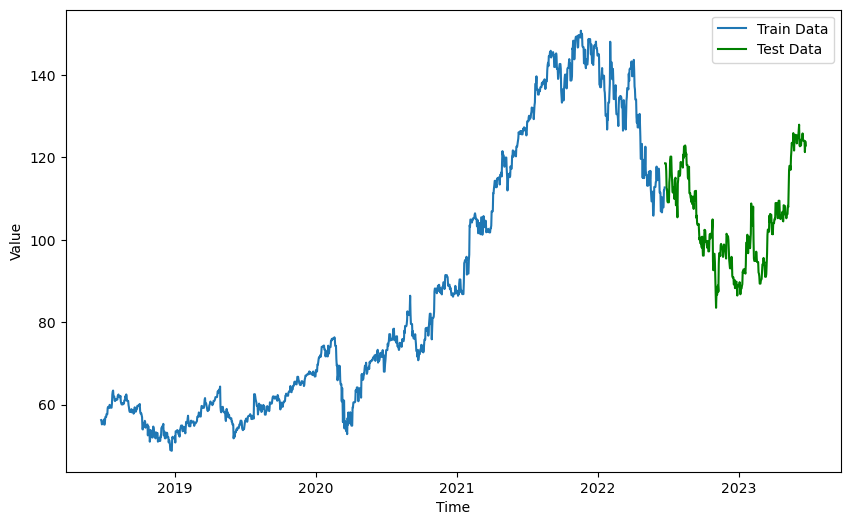

In [21]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [22]:
import pmdarima as pm

In [23]:
# Fit the ARIMA model
model = pm.auto_arima(ts_train, seasonal=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2557.484
Date:                Fri, 23 Jun 2023   AIC                           5118.967
Time:                        18:48:07   BIC                           5129.538
Sample:                    06-25-2018   HQIC                          5122.911
                         - 06-23-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0758      0.018     -4.186      0.000      -0.111      -0.040
sigma2         1.9502      0.035     55.701      0.000       1.882       2.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2626.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.58   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(ts_train.values, order=(0, 1, 1))  # Replace p, d, q with appropriate values
model = model.fit()

(array([3.00908236e-02, 1.27858843e-01, 5.43155661e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.08631132e-04]),
 array([-6.81062338, -0.50551091,  5.79960157, 12.10471405, 18.40982653,
        24.71493901, 31.02005149, 37.32516397, 43.63027645, 49.93538892,
        56.2405014 ]),
 <BarContainer object of 10 artists>)

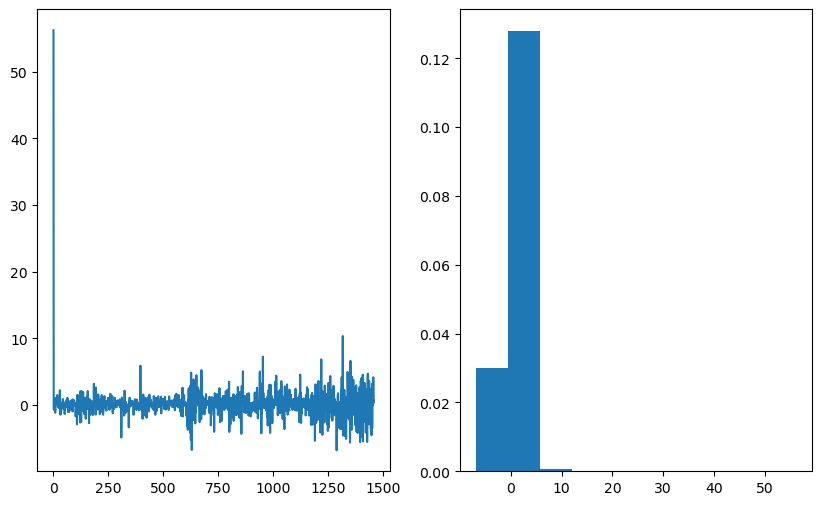

In [25]:
residuals = pd.DataFrame(model.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [26]:
# Forecast
forecast_steps = int(ts.size) - int(ts.size * .8)  # Number of future time steps to forecas

In [27]:
forecast = model.forecast(steps=forecast_steps)

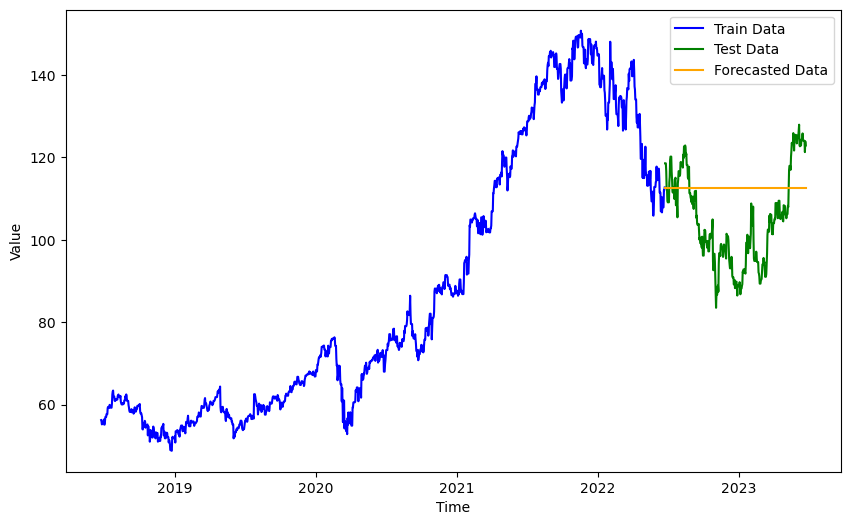

In [28]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, 'blue', label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.plot(ts_test.index, forecast, 'orange', label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

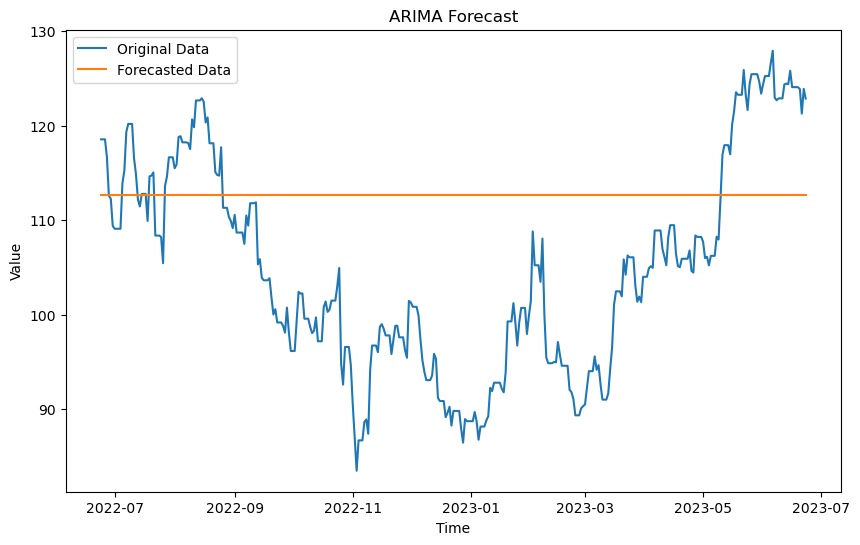

In [29]:
# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts_test.index, ts_test.values, label='Original Data')
plt.plot(ts_test.index, forecast, label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.show()